# **ANÁLISE DE REDES**
## Atividade 01 - Prática com PyVis e Streamlit
# **Autores**
### José Alex
### Fabricio Cruz

## **Instalando pyvis**

In [ ]:
!pip install pyvis
!pip install scipy


### **Sobre o dataset:** O OpenFlights/Airline Route Mapper Route Database mapeou 59.036 rotas entre 3.209 aeroportos em 531 companhias aéreas em todo o mundo em janeiro de 2012. Segue aqui o link do dataset disponível no Kaggle: <https://www.kaggle.com/datasets/open-flights/flight-route-database>

### Os nós são aeroportos nomeados com o código aeroportuário IATA que é uma sigla composta por três letras, utilizada para designar os aeroportos em todo o mundo. É definido pela Associação Internacional de Transportes Aéreos, que tem sede em Toronto, no Canadá. Já as arestas são as conexões entre um aeroporto e outro, representam as linhas aéreas conectando origem e destino de viagens.

## **Importando bibliotecas e dataset routes R**

In [7]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import collections

got_data = pd.read_csv("https://raw.githubusercontent.com/pupimvictor/NetworkOfThrones/master/stormofswords.csv")
routes_data = pd.read_csv("assets/routes.csv")

R = nx.from_pandas_edgelist(routes_data, source = "Source", target = "Target", create_using=nx.DiGraph())

### Filtrando o grafo para obter um subgrafo fortemente conectado chamado R_Sub para executar alguns comandos exigidos.

In [ ]:
# Check if there is any node left with degree d
def check(h, d):
    f = 0  # there is no node of deg <= d
    for i in h.nodes():
        if (h.degree(i) <= d):
            f = 1
            break
    return f


# Find list of nodes with particular degree
def find_nodes(h, it):
    set1 = []
    for i in h.nodes():
        if (h.degree(i) <= it):
            set1.append(i)
    return set1


def remove_nodes_with_degree_equals(g, degree):
    # Copy the graph
    h = g.copy()
    it = degree

    # Bucket being filled currently
    tmp = []

    # list of lists of buckets
    buckets = []
    while (1):
        flag = check(h, it)
        if (flag == 0):
            it += 1
            buckets.append(tmp)
            tmp = []
        if (flag == 1):
            node_set = find_nodes(h, it)
            for each in node_set:
                # print(each)
                h.remove_node(each)
                tmp.append(each)
        if (h.number_of_nodes() == 0):
            buckets.append(tmp)
            break
    g.remove_nodes_from(buckets[0])

R_Sub = R.copy()
print("Quantidade de nós inicial {}".format(len(R_Sub.nodes())))
print("R_Sub {} fortemente conectado".format("é" if nx.is_strongly_connected(R_Sub) else "não é"))
# R_Sub vai ser modificado para perder nós até ficar fortemente conectado
remove_nodes_with_degree_equals(R_Sub, 4)
print("Quantidade de nós final {}".format(len(R_Sub.nodes())))
print("R_Sub {} fortemente conectado".format("é" if nx.is_strongly_connected(R_Sub) else "não é"))

## **Exibindo matriz de adjacencia**
Uma matriz de adjacência é uma representação de uma estrutura de dados em forma de matriz bidimensional, onde as linhas e colunas representam os vértices de um grafo.

Devido ao dataset ser muito grande a matriz fica resumida no output

In [ ]:
print(nx.adjacency_matrix(R).todense())

## **Diâmetro da rede**
O diâmetro de um grafo é definido como o maior caminho mínimo entre quaisquer dois vértices do grafo. Em outras palavras, é a maior distância possível entre dois vértices no grafo.
A periferia de um grafo é definida como o conjunto de vértices que estão a uma distância máxima do centro do grafo. 

Estamos usando o subgrafo R_Sub que foi obtido logo no inicio deste notebook já com esse objetivo de possibilitar certo cálculos

In [ ]:
print('diameter: ', nx.diameter(R_Sub))
print('periphery: ', nx.periphery(R_Sub))

### Esparsidade/Densidade da Rede
A esparsidade em NetworkX refere-se à proporção de arestas presentes em um grafo em relação ao número total de possíveis arestas. Um grafo esparsamente conectado é aquele em que o número de arestas é muito menor do que o número máximo possível de arestas. Por outro lado, um grafo densamente conectado tem um grande número de arestas em relação ao número total possível. Podemos calcular essa métrica através do comando nx.density(R), que retorna um valor no intervalo de 0 à 1, quanto maior o valor mais denso ele é e quanto menor mais esparso é.

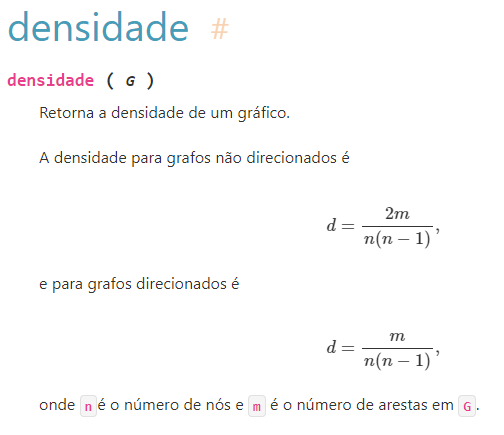

In [ ]:
density = nx.density(R)
print("Densidade de R: ", density)
print("Densidade baixa indica que o grafo é muito esparso")

## **Histograma de distribuição empírica de grau**

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(R_Sub)
plt.axis('off')
nx.draw_networkx_nodes(R_Sub, pos, node_size=20)
nx.draw_networkx_edges(R_Sub, pos, alpha=0.4)

## **Coeﬁciente de clustering local para nós escolhidos.**

In [ ]:
print('Clusterização')
print('Aeroporto Santos Dumont (SDU): ', nx.clustering(R, 'SDU'))
print('Aeroporto de Guarulhos (GRU): ', nx.clustering(R, 'GRU'))
print('Ambos os nós possuem valores de clusterização baixo que indica que os seus nós adjacentes não se conectam muito entre si.\n')

## **Coeﬁciente de clustering global**

In [ ]:
print('Clusterização global: ', nx.average_clustering(R))

## **Componentes Conectados Fortemente**

In [ ]:
print('O grafo R {} fortemente conectado!'.format('é' if nx.is_strongly_connected(R) else 'não é'))
print('Quantidade de nós de R: {}'.format(len(R.nodes())))
print('Quantidade de componentes fortemente conectados: {}\n'.format(nx.number_strongly_connected_components(R)))

print('O subgrafo R_Sub {} fortemente conectado!'.format('é' if nx.is_strongly_connected(R_Sub) else 'não é'))
print('Quantidade de nós de R_Sub: {}'.format(len(R_Sub.nodes())))
print('Quantidade de componentes fortemente conectados: {}'.format(nx.number_strongly_connected_components(R_Sub)))

## **Componentes Conectados Fracamente.**

In [ ]:
print('O grafo {} fracamente conectado!'.format('é' if nx.is_weakly_connected(R) else 'não é'))
print('Quantidade de nós de R: {}'.format(len(R.nodes())))
print('Quantidade de nós fracamente conectados: {}'.format(nx.number_weakly_connected_components(R)))

## **Eigenvector centrality**

In [ ]:
print('Grau de centralidade do autovetor: ', nx.eigenvector_centrality(R))

## **Degree centrality**

In [ ]:
print('Grau de centralidade: ', nx.degree_centrality(R))

## **Closeness centrality**

In [ ]:
print('Grau de centralidade de proximidade: ', nx.closeness_centrality(R))

## **Betweenness centrality**

In [ ]:
print('Grau de centralidade de intermediação do caminho mais curto: ', nx.betweenness_centrality(R))

## **Assortatividade geral da rede**
Assortatividade refere-se à tendência de nós semelhantes se conectarem uns aos outros com maior probabilidade do que se conectarem a nós diferentes. Em outras palavras, é a tendência dos nós de uma rede se ligarem a outros nós com características semelhantes. Redes dissortativas são o oposto de redes assortativas. Enquanto nas redes assortativas nós semelhantes têm maior probabilidade de se conectarem, nas redes dissortativas nós com características diferentes tendem a se conectar mais frequentemente.

In [ ]:
print('Coeficiente de assortatividade da rede: ', nx.degree_assortativity_coefficient(R))